In [1]:
import pandas as pd

df = pd.read_csv('ViewingActivity.csv')

In [2]:
df.shape

(43134, 10)

In [3]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Grandpa,2021-09-12 14:41:50,00:23:22,NaN,The 100: Season 1: The Calm (Episode 11),NaN,Chrome PC (Cadmium),00:36:36,00:36:36,CO (Colombia)
1,Grandpa,2021-09-12 00:14:47,00:12:30,NaN,The 100: Season 1: The Calm (Episode 11),NaN,Chrome PC (Cadmium),00:13:14,Not latest view,CO (Colombia)
2,Grandpa,2021-09-11 23:33:55,00:40:51,NaN,The 100: Season 1: I Am Become Death (Episode 10),NaN,Chrome PC (Cadmium),00:41:12,00:41:12,CO (Colombia)
3,Grandpa,2021-09-11 23:00:09,00:33:44,NaN,The 100: Season 1: Unity Day (Episode 9),NaN,Chrome PC (Cadmium),00:39:41,00:39:41,CO (Colombia)
4,Grandpa,2021-09-11 20:33:52,00:05:07,NaN,The 100: Season 1: Unity Day (Episode 9),NaN,Chrome PC (Cadmium),00:05:56,Not latest view,CO (Colombia)


In [4]:
# Dropping everything as the Netflix example except 'Profile Names' for later analysis
df = df.drop(['Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)

df.head(1)

,Profile Name,Start Time,Duration,Title
0,Grandpa,2021-09-12 14:41:50,00:23:22,The 100: Season 1: The Calm (Episode 11)


In [5]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

df.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
dtype: object

In [6]:
df = df.set_index('Start Time')

df.index = df.index.tz_convert('US/Eastern')

df = df.reset_index()

df.head(1)

,Start Time,Profile Name,Duration,Title
0,2021-09-12 10:41:50-04:00,Grandpa,00:23:22,The 100: Season 1: The Calm (Episode 11)


In [7]:
df['Duration'] = pd.to_timedelta(df['Duration'])

df.dtypes

Start Time      datetime64[ns, US/Eastern]
Profile Name                        object
Duration                   timedelta64[ns]
Title                               object
dtype: object

In [8]:
# Also analyzing the Office because it was my whole family's favorite show for awhile

office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]

office.sample(20)

,Start Time,Profile Name,Duration,Title
14025,2018-10-12 20:47:00-04:00,Seeking,0 days 00:08:10,The Office (U.S.): Season 3: The Merger (Episo...
12740,2019-11-22 16:31:02-05:00,Seeking,0 days 00:21:28,The Office (U.S.): Season 6: The Cover-Up (Epi...
30744,2013-01-20 00:05:37-05:00,Seeking,0 days 00:21:52,The Office (U.S.): Season 2: Halloween (Episod...
20452,2016-07-25 01:41:51-04:00,Seeking,0 days 00:21:29,The Office (U.S.): Season 9: Suit Warehouse (E...
41704,2017-01-03 14:32:45-05:00,The Girls,0 days 00:29:34,The Office (U.S.): Season 3: The Merger (Episo...
17450,2017-05-22 00:12:52-04:00,Seeking,0 days 00:21:30,The Office (U.S.): Season 4: The Deposition (E...
13943,2018-10-22 15:19:28-04:00,Seeking,0 days 00:03:13,The Office (U.S.): Season 5: Lecture Circuit: ...
12651,2019-12-08 19:46:48-05:00,Seeking,0 days 00:21:23,The Office (U.S.): Season 8: The List (Episode 1)
14032,2018-10-11 18:41:34-04:00,Seeking,0 days 00:20:47,The Office (U.S.): Season 3: Grief Counseling ...
40153,2018-06-28 22:55:04-04:00,The Girls,0 days 00:14:15,The Office (U.S.): Season 2: Office Olympics (...


In [9]:
office.shape

(1131, 4)

In [10]:
office = office[(office['Duration'] > '0 days 00:01:00')]

office.shape

(1072, 4)

In [11]:
office['Duration'].sum()

Timedelta('14 days 15:45:52')

In [12]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour

office.head(1)

,Start Time,Profile Name,Duration,Title,weekday,hour
12546,2019-12-30 19:30:44-05:00,Seeking,0 days 00:50:33,The Office (U.S.): Season 9: Finale (Episode 23),0,19


<AxesSubplot:title={'center':'Office Episodes Watched by Day'}>

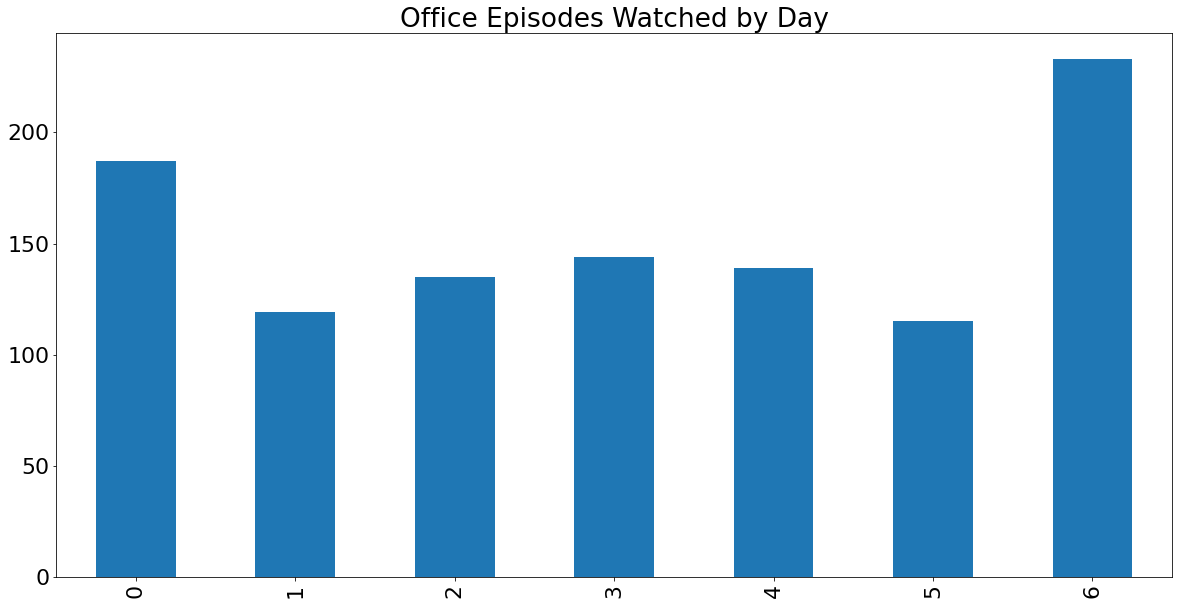

In [35]:
%matplotlib inline
import matplotlib

office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

office_by_day = office['weekday'].value_counts()

office_by_day = office_by_day.sort_index()

matplotlib.rcParams.update({'font.size': 22})

office_by_day.plot(kind= 'bar', figsize=(20,10), title='Office Episodes Watched by Day')

<AxesSubplot:title={'center':'Office Episodes Watched by Hour'}>

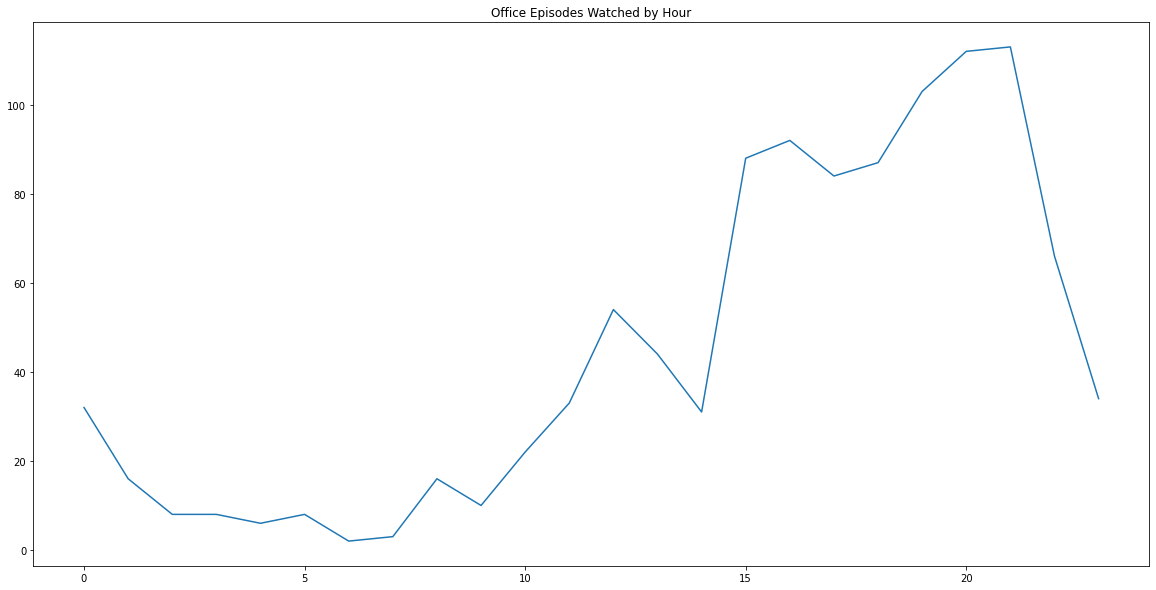

In [14]:
office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

office_by_hour = office['hour'].value_counts()

office_by_hour = office_by_hour.sort_index()

office_by_hour.plot(kind='line', figsize=(20,10), title='Office Episodes Watched by Hour')

In [15]:
# Counting how many times each profile watched netflix for a Pie Chart

watching_list = []

Grandpa = df[df['Profile Name'].str.contains('Grandpa', regex=True)]
print('Grandpa watched:', Grandpa['Profile Name'].count(), 'times')
watching_list.append(Grandpa['Profile Name'].count())

Seeking = df[df['Profile Name'].str.contains('Seeking', regex=True)]
print('Mom and Dad watched:', Seeking['Profile Name'].count(), 'times')
watching_list.append(Seeking['Profile Name'].count())

Kids = df[df['Profile Name'].str.contains('Kids', regex=True)]
print('Kids watched:', Kids['Profile Name'].count(), 'times')
watching_list.append(Kids['Profile Name'].count())

Girls = df[df['Profile Name'].str.contains('The Girls', regex=True)]
print('The Girls watched:', Girls['Profile Name'].count(), 'times')
watching_list.append(Girls['Profile Name'].count())

Grandpa watched: 1376 times
Mom and Dad watched: 27509 times
Kids watched: 6077 times
The Girls watched: 8172 times


In [18]:
Grandpa = Grandpa.loc[::-1].reset_index()

Seeking = Seeking.loc[::-1].reset_index()

Kids = Kids.loc[::-1].reset_index()

Girls = Girls.loc[::-1].reset_index()

Grandpa.head()

,index,Start Time,Profile Name,Duration,Title
0,1375,2018-01-07 23:15:11-05:00,Grandpa,0 days 00:25:02,Bright
1,1374,2018-01-09 21:48:47-05:00,Grandpa,0 days 00:27:54,Bright
2,1373,2018-01-10 06:50:33-05:00,Grandpa,0 days 01:11:03,Bright
3,1372,2018-01-10 22:19:20-05:00,Grandpa,0 days 00:52:52,Wanted
4,1371,2018-01-11 21:50:09-05:00,Grandpa,0 days 01:16:47,1922


In [19]:
# Checking that my list is correct
print(watching_list)

[1376, 27509, 6077, 8172]


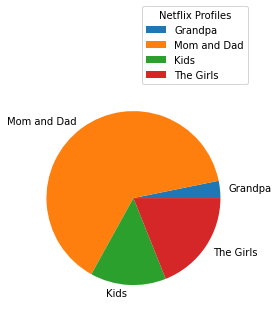

In [20]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(watching_list)
my_labels = ['Grandpa', 'Mom and Dad', 'Kids', 'The Girls']

plt.pie(y, labels = my_labels)
plt.legend(title = 'Netflix Profiles', bbox_to_anchor = (1.05, 1.0), loc = 'lower right')
plt.show()

In [21]:
# Beginning analysis for multiple line graphs. I am renaming each profile as 1. 
# Works because I already seperated each profile into their own dataframe

Grandpa['Profile Name'] = 1
Grandpa['Count'] = Grandpa['Profile Name'].cumsum()
Grandpa.head()

,index,Start Time,Profile Name,Duration,Title,Count
0,1375,2018-01-07 23:15:11-05:00,1,0 days 00:25:02,Bright,1
1,1374,2018-01-09 21:48:47-05:00,1,0 days 00:27:54,Bright,2
2,1373,2018-01-10 06:50:33-05:00,1,0 days 01:11:03,Bright,3
3,1372,2018-01-10 22:19:20-05:00,1,0 days 00:52:52,Wanted,4
4,1371,2018-01-11 21:50:09-05:00,1,0 days 01:16:47,1922,5


In [22]:
Seeking['Profile Name'] = 1
Seeking['Count'] = Seeking['Profile Name'].cumsum()
Seeking.head()

,index,Start Time,Profile Name,Duration,Title,Count
0,34961,2010-11-28 14:49:28-05:00,1,0 days 00:50:57,Christmas Classics: Vol. 1,1
1,34960,2010-11-28 14:58:58-05:00,1,0 days 00:00:41,"Monsters, Inc.",2
2,34959,2010-11-28 16:09:03-05:00,1,0 days 01:34:01,Race to Witch Mountain,3
3,34958,2010-11-28 16:42:57-05:00,1,0 days 01:37:51,The Princess and the Frog,4
4,34957,2010-11-28 21:11:19-05:00,1,0 days 01:35:04,Legion,5


In [23]:
Kids['Profile Name'] = 1
Kids['Count'] = Kids['Profile Name'].cumsum()
Kids.head()

,index,Start Time,Profile Name,Duration,Title,Count
0,7452,2010-11-28 14:49:28-05:00,1,0 days 00:50:57,Christmas Classics: Vol. 1,1
1,7451,2010-11-28 14:58:58-05:00,1,0 days 00:00:41,"Monsters, Inc.",2
2,7450,2010-11-28 16:09:03-05:00,1,0 days 01:34:01,Race to Witch Mountain,3
3,7449,2010-11-28 16:42:57-05:00,1,0 days 01:37:51,The Princess and the Frog,4
4,7448,2010-12-01 17:35:32-05:00,1,0 days 01:29:51,Anastasia,5


In [24]:
Girls['Profile Name'] = 1
Girls['Count'] = Girls['Profile Name'].cumsum()
Girls.head()

,index,Start Time,Profile Name,Duration,Title,Count
0,43133,2014-12-31 14:20:21-05:00,1,0 days 00:51:47,American Horror Story: Murder House: Pilot (Ep...,1
1,43132,2014-12-31 14:33:35-05:00,1,0 days 00:22:31,That '70s Show: Season 1: Eric's Burger Job (E...,2
2,43131,2014-12-31 14:56:49-05:00,1,0 days 00:12:30,That '70s Show: Season 1: The Keg (Episode 6),3
3,43130,2015-01-03 19:58:04-05:00,1,0 days 01:30:28,White Chicks,4
4,43129,2015-01-15 13:22:19-05:00,1,0 days 00:22:23,That '70s Show: Season 1: Drive-In (Episode 8),5


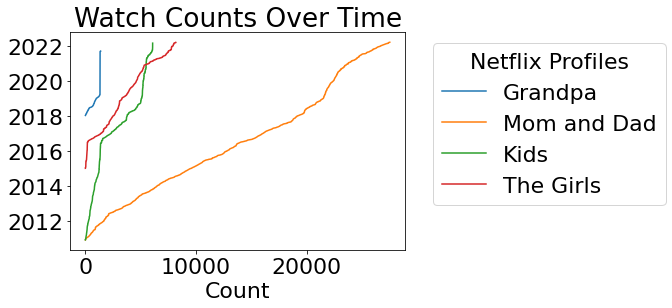

In [38]:
# Displaying the amount of times watched across time

import matplotlib.pyplot as plt
import pandas as pd

ax = Grandpa.plot(x='Count', y='Start Time', label = 'Grandpa')
Seeking.plot(ax=ax, x='Count', y='Start Time', label = 'Mom and Dad')
Kids.plot(ax=ax, x='Count', y='Start Time', label = 'Kids')
Girls.plot(ax=ax, x='Count', y='Start Time', label = 'The Girls', title='Watch Counts Over Time')

plt.legend(title = 'Netflix Profiles', bbox_to_anchor = (1.05, 1.0), loc = 'upper left')

plt.show()

In [27]:
# Converting duration to seconds then minutes
import datetime

df['DurationInMin'] = df["Duration"].dt.total_seconds()/60

In [28]:
# Checking that Duration was converted to minutes
print(df["DurationInMin"])

0        23.366667
1        12.500000
2        40.850000
3        33.733333
4         5.116667
           ...    
43129    22.383333
43130    90.466667
43131    12.500000
43132    22.516667
43133    51.783333
Name: DurationInMin, Length: 43134, dtype: float64


In [45]:
# Statistical Data Analysis

print('All values are in minutes.\n')

print('Average Duration:', df["DurationInMin"].mean())

print('Median Duration:', df["DurationInMin"].median())

print('Max Duration:', df["DurationInMin"].max(), '\n    ^We must have left the TV on, oops')

print('Min Duration:', df["DurationInMin"].min())

print('Standard Deviation of Duration:', df["DurationInMin"].std())

All values are in minutes.

Average Duration: 25.31676596961426
Median Duration: 21.566666666666666
Max Duration: 1007.1500000000001 
    ^We must have left the TV on, oops
Min Duration: 0.016666666666666666
Standard Deviation of Duration: 26.128126535718348


In [30]:
# Adding month column

Grandpa['month'] = Grandpa['Start Time'].dt.month

Seeking['month'] = Seeking['Start Time'].dt.month

Kids['month'] = Kids['Start Time'].dt.month

Girls['month'] = Girls['Start Time'].dt.month

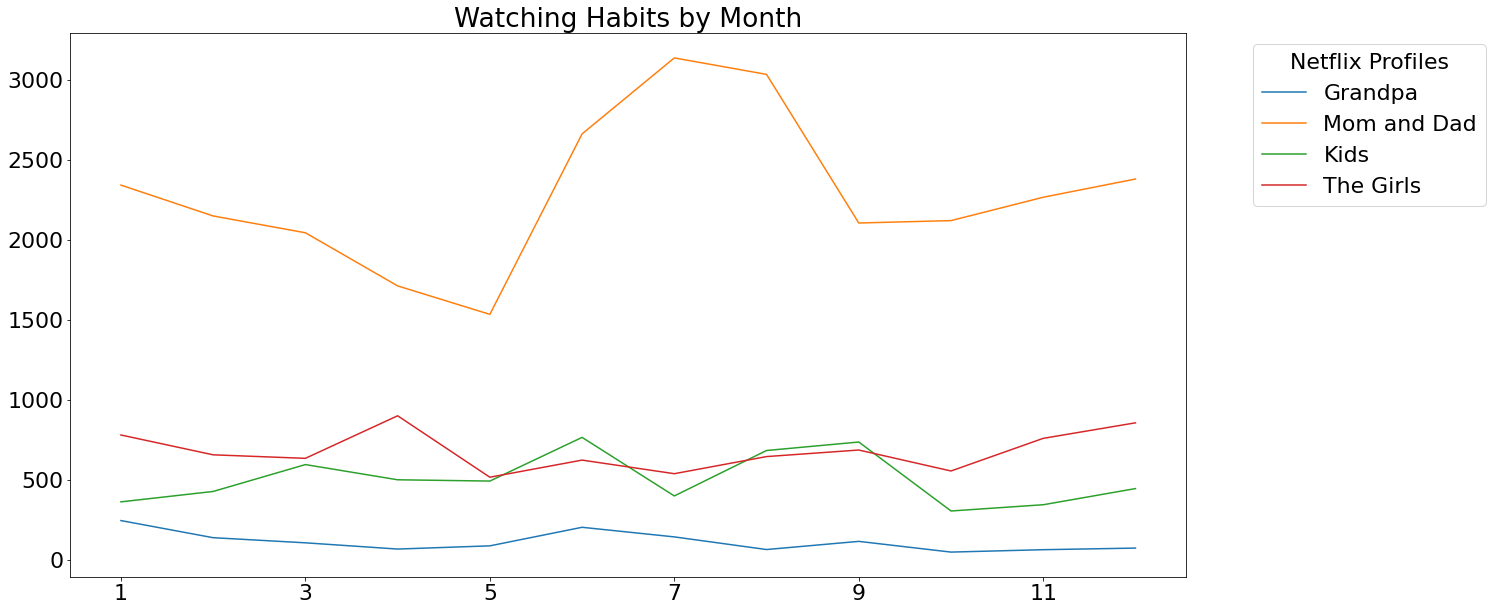

In [37]:
# Monthly summary of when each profile watches netflix the most

Grandpa['month'] = pd.Categorical(Grandpa['month'], categories=
    [1,2,3,4,5,6,7,8,9,10,11,12],
    ordered=True)
Grandpa_month = Grandpa['month'].value_counts()
Grandpa_month = Grandpa_month.sort_index()

Seeking['month'] = pd.Categorical(Seeking['month'], categories=
    [1,2,3,4,5,6,7,8,9,10,11,12],
    ordered=True)
Seeking_month = Seeking['month'].value_counts()
Seeking_month = Seeking_month.sort_index()

Kids['month'] = pd.Categorical(Kids['month'], categories=
    [1,2,3,4,5,6,7,8,9,10,11,12],
    ordered=True)
Kids_month = Kids['month'].value_counts()
Kids_month = Kids_month.sort_index()

Girls['month'] = pd.Categorical(Girls['month'], categories=
    [1,2,3,4,5,6,7,8,9,10,11,12],
    ordered=True)
Girls_month = Girls['month'].value_counts()
Girls_month = Girls_month.sort_index()

ax = Grandpa_month.plot(kind='line', figsize=(20,10), label = 'Grandpa')
Seeking_month.plot(ax=ax, label = 'Mom and Dad')
Kids_month.plot(ax=ax, label = 'Kids')
Girls_month.plot(ax=ax, label = 'The Girls', title='Watching Habits by Month')

plt.legend(title = 'Netflix Profiles', bbox_to_anchor = (1.05, 1.0), loc = 'upper left')

plt.show()